# 주제 : 담뱃값과 흡연율 간의 상관관계
부제 : 담뱃값 인상이 흡연율 감소에 효과적인가?

(1) 데이터셋 
- 지출목적별 분류 소비자물가지수 (자료 출처 : 통계청)
- 국제통계연감:1인당 담배소비량(OECD) (자료 출처 : 통계청)

(2) 탐구 질문
- 담뱃값 인상 정책이 시행된 시점을 전 후로 흡연율이 어떠한 차이를 보이는가?
- 담뱃값 변화율이 흡연율 감소에 영향을 미치는가? 
- 담뱃값 인상 정책이 그 목적에 부합하는 효과적인 정책인가?

(3) 분석할 변수(요인)
- 흡연율 : 1인당 담배 소비량
- 담뱃값 : 담배 소비자물가지수

(4) 가설
- 담뱃값이 인상되면 흡연율 감소 효과가 나타날 것이다. 그러나 흡연율 감소 효과는 일시적일 것이다. 
- 담뱃값 인상 금액이 높으면 낮은 경우에 비해 흡연율 감소에 더욱 효과적일 것이다. <br>

*소비자 물가지수는 소비자가 일상생활에 쓰기 위하여 구입하는 재화와 서비스(소비재)의 가격변동을 나타내는 물가지수이다. 담배 품목의 소비자 물가지수를 이용하여 담배값의 변동을 파악한다. <br>
*흡연율은 인당 담배 소비량으로 대체하여 해석한다. <br>
*데이터 분석은 2001년에서 2018년까지를 대상으로 한다. <br>

#  1. 데이터 전처리

In [1]:
import numpy.random as random
import scipy as sp
import scipy.stats as stats
import pandas as pd
from pandas import Series, DataFrame

# 시각화 라이브러리
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 소수점 3자리까지 표시
%precision 3

'%.3f'

In [2]:
df = pd.read_csv('consumer_price_index.csv', encoding='utf-8') # 지출품목별 소비자 물가지수 데이터 불러오기.
data = df.loc[:,['기간','담배']] # 담배 품목 소비자 물가지수만 추출하기. 
data.rename(columns={'담배': '담배 소비자 물가지수'}, inplace=True)
data

,기간,담배 소비자 물가지수
0,2001.01,37.291
1,2001.02,37.291
2,2001.03,37.291
3,2001.04,37.291
4,2001.05,37.291
...,...,...
238,2020.11,100.000
239,2020.12,100.000
240,2021.01,100.000
241,2021.02,100.000


In [3]:
data['년도'] = data['기간'].map(lambda x: str(x)[0:4]) # 년도 열 추가 생성하기. 
data

,기간,담배 소비자 물가지수,년도
0,2001.01,37.291,2001
1,2001.02,37.291,2001
2,2001.03,37.291,2001
3,2001.04,37.291,2001
4,2001.05,37.291,2001
...,...,...,...
238,2020.11,100.000,2020
239,2020.12,100.000,2020
240,2021.01,100.000,2021
241,2021.02,100.000,2021


In [4]:
price_increase_section = [2000, 2001, 2004, 2014, 2021] # 역대 담뱃값 인상 열 추가 생성하기. 
group_names = ['5th', '6th', '7th', '8th']
price_increase_section_cut_data = pd.cut(data['년도'].astype('int'), price_increase_section, labels = group_names )
data['담뱃값 인상'] = price_increase_section_cut_data
data

,기간,담배 소비자 물가지수,년도,담뱃값 인상
0,2001.01,37.291,2001,5th
1,2001.02,37.291,2001,5th
2,2001.03,37.291,2001,5th
3,2001.04,37.291,2001,5th
4,2001.05,37.291,2001,5th
...,...,...,...,...
238,2020.11,100.000,2020,8th
239,2020.12,100.000,2020,8th
240,2021.01,100.000,2021,8th
241,2021.02,100.000,2021,8th


In [5]:
df2= pd.read_excel('cigarette_consumption.xlsx', encoding='utf-8') # 1인당 담배 소비량 데이터 불러오기. 
k_data = df2.iloc[1,1:]
cigarette_consumption_map = k_data

data['인당 담배 소비량'] = data['년도'].map(cigarette_consumption_map) # 인당 담배 소비량 열 추가 생성하기.
df1 = data.dropna() # 결측값 제거하기.
df1

,기간,담배 소비자 물가지수,년도,담뱃값 인상,인당 담배 소비량
0,2001.01,37.291,2001,5th,2638
1,2001.02,37.291,2001,5th,2638
2,2001.03,37.291,2001,5th,2638
3,2001.04,37.291,2001,5th,2638
4,2001.05,37.291,2001,5th,2638
...,...,...,...,...,...
211,2018.08,100.000,2018,8th,1605
212,2018.09,100.000,2018,8th,1605
213,2018.10,100.000,2018,8th,1605
214,2018.11,100.000,2018,8th,1605


In [6]:
cigarette_price ={
    '5th': 1800,
    '6th': 2000,
    '7th': 2500,
    '8th': 4500
}

df1['담배 가격'] = df1['담뱃값 인상'].map(cigarette_price) # 담배 가격 열 추가 생성하기. 
df1

<ipython-input-6-f557e30bf983>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['담배 가격'] = df1['담뱃값 인상'].map(cigarette_price) # 담배 가격 열 추가 생성하기.


,기간,담배 소비자 물가지수,년도,담뱃값 인상,인당 담배 소비량,담배 가격
0,2001.01,37.291,2001,5th,2638,1800
1,2001.02,37.291,2001,5th,2638,1800
2,2001.03,37.291,2001,5th,2638,1800
3,2001.04,37.291,2001,5th,2638,1800
4,2001.05,37.291,2001,5th,2638,1800
...,...,...,...,...,...,...
211,2018.08,100.000,2018,8th,1605,4500
212,2018.09,100.000,2018,8th,1605,4500
213,2018.10,100.000,2018,8th,1605,4500
214,2018.11,100.000,2018,8th,1605,4500


# 2. 담뱃값과 인당 담배 소비량 간의 상관관계 분석하기.<br>
## (1) 그래프 작성하기.

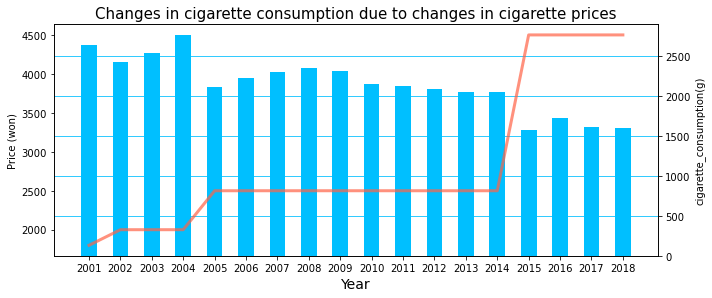

In [7]:
# 담뱃값과 인당 담배 소비량 간의 상관관계를 시각화하기 위한 그래프 작성하기. 

con_data = df1['인당 담배 소비량']
pri_data = df1['담배 가격'].astype('int')
year = df1['년도']

plt.figure(figsize=(10, 4))
ax1, ax2 = plt.gca(), plt.gca().twinx()

ax1.plot(year, pri_data, color='tomato', linewidth=3, alpha=0.7)
ax1.set_xlabel('Year', fontsize = '14')
ax1.set_ylabel('Price (won)')
#ax1.tick_params('y', direction='in', color='red')

ax2.bar(year, con_data, color='deepskyblue', label='Consumption', alpha=1.0, width=0.5)
ax2.set_xlabel('Year')
ax2.set_ylabel('cigarette_consumption(g)')
#ax2.tick_params('y',  direction='in', color='blue')

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)
plt.grid(True, color = 'deepskyblue')
plt.tight_layout()
plt.title("Changes in cigarette consumption due to changes in cigarette prices", fontsize=15)
plt.show()

## (2) 피어슨 상관계수 활용하기. 

In [8]:
# 피어슨 상관계수를 이용하여 담뱃값과 인당 담배 소비량 간의 상관관계 파악하기. 
[R, p] = stats.pearsonr(df1['담배 가격'].astype('int'), df1['인당 담배 소비량'].astype('int'))
print([R, p])

#매우 강한 음의 상관관계를 나타내며, 상관계수가 유의하다는 것을 알 수 있음. 

[-0.9150168119794673, 2.5439411654138654e-86]


# 3. 담배 소비량 증감율과 담뱃값 변화율 간의 상관관계 분석하기.

## (1) 전년 대비 인당 담배 소비량 증감율 계산하기. 

In [9]:
def cigarette_rate():
    for k in range(0,17,1):
        a  = ((((k_data[k+1])*100)/k_data[k])-100)
        b = k_data.index[k+1]
        c = k_data.index[k]
        rate = ("'%s ~ %s' : %.3f,"  %(c,b,a))
        print(rate)
        
cigarette_rate()

'2001 ~ 2002' : -7.961,
'2002 ~ 2003' : 4.366,
'2003 ~ 2004' : 8.919,
'2004 ~ 2005' : -23.333,
'2005 ~ 2006' : 5.246,
'2006 ~ 2007' : 3.233,
'2007 ~ 2008' : 2.044,
'2008 ~ 2009' : -1.364,
'2009 ~ 2010' : -7.044,
'2010 ~ 2011' : -0.930,
'2011 ~ 2012' : -1.689,
'2012 ~ 2013' : -1.957,
'2013 ~ 2014' : 0.000,
'2014 ~ 2015' : -23.028,
'2015 ~ 2016' : 8.792,
'2016 ~ 2017' : -6.570,
'2017 ~ 2018' : -0.124,


In [10]:
cigarette_rate ={
    
    '2002' : -7.961,
    '2003' : 4.366,
    '2004' : 8.919,
    '2005' : -23.333,
    '2006' : 5.246,
    '2007' : 3.233,
    '2008' : 2.044,
    '2009' : -1.364,
    '2010' : -7.044,
    '2011' : -0.930,
    '2012' : -1.689,
    '2013' : -1.957,
    '2014' : 0.000,
    '2015' : -23.028,
    '2016' : 8.792,
    '2017' : -6.570,
    '2018' : -0.124
}

df1['전년 대비 담배 소비량 증감율'] = df1['년도'].map(cigarette_rate) # 전년 대비 담배 소비량 증감율 열 추가 생성하기. 
df1

<ipython-input-10-7d1736b67a4a>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['전년 대비 담배 소비량 증감율'] = df1['년도'].map(cigarette_rate) # 전년 대비 담배 소비량 증감율 열 추가 생성하기.


,기간,담배 소비자 물가지수,년도,담뱃값 인상,인당 담배 소비량,담배 가격,전년 대비 담배 소비량 증감율
0,2001.01,37.291,2001,5th,2638,1800,NaN
1,2001.02,37.291,2001,5th,2638,1800,NaN
2,2001.03,37.291,2001,5th,2638,1800,NaN
3,2001.04,37.291,2001,5th,2638,1800,NaN
4,2001.05,37.291,2001,5th,2638,1800,NaN
...,...,...,...,...,...,...,...
211,2018.08,100.000,2018,8th,1605,4500,-0.124
212,2018.09,100.000,2018,8th,1605,4500,-0.124
213,2018.10,100.000,2018,8th,1605,4500,-0.124
214,2018.11,100.000,2018,8th,1605,4500,-0.124


## (2) 전년 대비 담뱃값 변화율 계산하기. 

In [11]:
cigarette_price = [1800, 2000, 2500, 4500]
a = len(cigarette_price)

for k in range(a-1):
    print(((cigarette_price[k+1]*100)/cigarette_price[k])-100)
    
price_rate ={
    '6th': 11.11,
    '7th': 25.0,
    '8th': 80.0
}

df1['전년 대비 담뱃값 변화율'] = df1['담뱃값 인상'].map(price_rate) # 전년 대비 담뱃값 변화율 열 추가 생성하기. 
df1

11.111111111111114
25.0
80.0


<ipython-input-11-c0f04928206a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['전년 대비 담뱃값 변화율'] = df1['담뱃값 인상'].map(price_rate) # 전년 대비 담뱃값 변화율 열 추가 생성하기.


,기간,담배 소비자 물가지수,년도,담뱃값 인상,인당 담배 소비량,담배 가격,전년 대비 담배 소비량 증감율,전년 대비 담뱃값 변화율
0,2001.01,37.291,2001,5th,2638,1800,NaN,NaN
1,2001.02,37.291,2001,5th,2638,1800,NaN,NaN
2,2001.03,37.291,2001,5th,2638,1800,NaN,NaN
3,2001.04,37.291,2001,5th,2638,1800,NaN,NaN
4,2001.05,37.291,2001,5th,2638,1800,NaN,NaN
...,...,...,...,...,...,...,...,...
211,2018.08,100.000,2018,8th,1605,4500,-0.124,80.0
212,2018.09,100.000,2018,8th,1605,4500,-0.124,80.0
213,2018.10,100.000,2018,8th,1605,4500,-0.124,80.0
214,2018.11,100.000,2018,8th,1605,4500,-0.124,80.0


## (3) 전년 대비 담배 소비량 증감율 그래프 작성하기. 

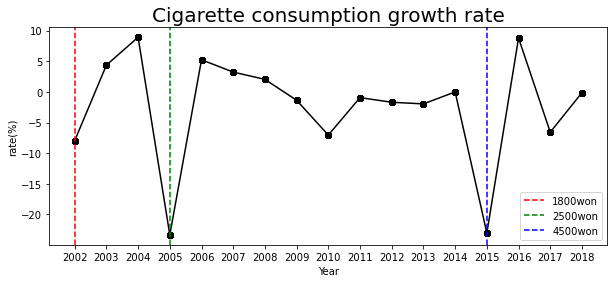

In [12]:
# 전년 대비 담배 소비량 증감율 그래프 작성하기. 
plt.figure(figsize=(10, 4))
plt.plot(year, df1['전년 대비 담배 소비량 증감율'] ,color = 'k', linestyle = '-', marker = 'o')
plt.xlabel('Year')
plt.ylabel('rate(%)')
plt.title('Cigarette consumption growth rate', fontsize = '20')
plt.axvline(x= '2002' , color='red', linestyle = '--', label = '1800won')
plt.axvline(x= '2005' , color='green', linestyle = '--', label = '2500won')
plt.axvline(x= '2015' , color='blue', linestyle = '--', label = '4500won')
plt.legend()

## (4) 피어슨 상관계수 활용하기. 

In [13]:
# 피어슨 상관계수를 활용하여 전년 대비 담배 소비량 증감율과 전년 대비 담뱃값 변화율 간의 상관관계 분석하기. 
cig_rate = df1['전년 대비 담배 소비량 증감율'][12:]
pri_gap = df1['전년 대비 담뱃값 변화율'][12:]
[R, p] = stats.pearsonr(pri_gap, cig_rate )
print([R, p])
#약한 음의 상관관계를 나타내며, 상관계수가 유의하다는 것을 알 수 있음.

[-0.20645392511844463, 0.0030503656967893443]


# 4. 가설 검증 및 결론

(1) 담뱃값이 인상된 시점은 전년에 비해 담배 소비량이 확연히 감소하였다. 또한, 담뱃값과 담배 소비량 간의 피어슨 상관계수가 매우 강한 음의 상관관계를 나타내었다. 이를 통해 담뱃값 인상 정책이 담배 소비량 감소 효과를 가져올 수 있음을 알 수 있다. 그러나 담뱃값이 인상된 시점 이후에는 다시 담배 소비량이 증가하는 등 지속적인 담배 소비량 감소효과를 나타내지 않았다. 이를 통해 담뱃값 인상 정책이 담배 소비량 감소 효과를 가져오지만 지속적인 효과를 기대하기에는 다소 무리가 있음을 알 수 있다. <br>
<br>
(2) 담뱃값이 200원 인상되었을 경우와 2000원 인상되었을 경우의 전년 대비 담배 소비량 증감율이 큰 차이를 나타내지 않았다. 오히려 200원 인상 되었을 경우의 담배 소비량 증감율이 -23.333%로 최대 감소율을 기록하였다. 또한, 담뱃값 변화율과 담배 소비량 증감율 간의 피어슨 상관계수가 약한 음의 상관관계를 나타내었다. 이를 통해 담뱃값 인상 비율과 담배 소비량 증감율이 무관함을 알 수 있으며 "담뱃값 인상 금액이 높으면 낮은 경우에 비해 흡연율 감소에 더욱 효과적일 것이다."라는 가설에 오류가 있음을 확인할 수 있다. 